In [18]:
import pandas as pd
import geopandas as gp
import glob
import os
import matplotlib.pylab as plt
import seaborn as sns

workingFolder = r"C:\Users\a0777676\OneDrive - Aon\Desktop\dataIncubatorTest\dinsRaster"


In [19]:
# importing the DINS data for different fire events

os.chdir(workingFolder)
dinsfn = glob.glob("*.shp")
dins = None
for i in range(0, len(dinsfn)):
    #print(dinsfn[i])
    dinsTemp = gp.GeoDataFrame.from_file(dinsfn[i])
    dins = pd.concat([dins, dinsTemp],ignore_index = True)
    print(dinsfn[i],dins.crs )


Bear2020+.shp {'init': 'epsg:4326'}


C:\Users\a0777676\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


Camp2018.shp {'init': 'epsg:4326'}
Kincade2019.shp {'init': 'epsg:4326'}
Lake2020.shp {'init': 'epsg:4326'}
LNU2020.shp {'init': 'epsg:4326'}


In [20]:
dins.head()

,APN,AerialRevi,CALFIREUNI,CITY,CREATEDDAT,County_Sit,DAMAGE,DECKPORCHE,DECKPORCHO,DINS_Damag,...,STREETTYPE,STRUCTUREC,STRUCTURET,VENTSCREEN,WINDOWPANE,ZIPCODE,geometry,slp,str,whp
0,NaN,NaN,LMU,NA,NaN,NaN,No Damage,No Deck/Porch,Masonry/Concrete,NaN,...,None,NaN,Commercial Building Single Story,"Mesh Screen <= 1/8""",Single Pane,NaN,POINT (-120.83429 39.92372),NaN,2.38151,3949
1,NaN,NaN,LMU,NA,NaN,NaN,No Damage,No Deck/Porch,Masonry/Concrete,NaN,...,None,NaN,Commercial Building Single Story,"Mesh Screen <= 1/8""",Single Pane,NaN,POINT (-120.83417 39.92363),NaN,2.38151,3949
2,NaN,NaN,LMU,NA,NaN,NaN,No Damage,No Deck/Porch,Masonry/Concrete,NaN,...,Road,NaN,Single Family Residence Multi Story,"Mesh Screen > 1/8""",Multi Pane,NaN,POINT (-120.85595 39.91694),NaN,4.94472,2226
3,NaN,NaN,LMU,NA,NaN,NaN,No Damage,Wood,No Deck/Porch,NaN,...,Road,NaN,Single Family Residence Multi Story,"Mesh Screen <= 1/8""",Multi Pane,NaN,POINT (-120.85713 39.91916),NaN,3.37111,8646
4,NaN,NaN,LMU,NA,NaN,NaN,No Damage,No Deck/Porch,Wood,NaN,...,Road,NaN,Utility Misc Structure,No Vents,Multi Pane,NaN,POINT (-120.85718 39.91940),NaN,3.37111,8646


In [21]:
dins['damageRatio'] = 0
dins.at[dins['DAMAGE'] == 'No Damage', 'damageRatio'] = 0
dins.at[dins['DAMAGE'] == 'Affected (1-9%)', 'damageRatio'] = 9
dins.at[dins['DAMAGE'] == 'Minor (10-25%)', 'damageRatio'] = 25
dins.at[dins['DAMAGE'] == 'Major (26-50%)', 'damageRatio'] = 50
dins.at[dins['DAMAGE'] == 'Destroyed (>50%)', 'damageRatio'] = 100

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

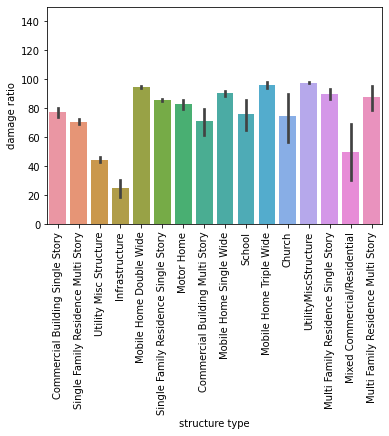

In [22]:
#damage ratio for different types of structures
ax = sns.barplot(x='STRUCTURET', y="damageRatio", data=dins)#, order=["No Damage", "Affected (1-9%)", "Minor (10-25%)", "Major (26-50%)", "Destroyed (>50%)"])
ax.set(xlabel='structure type', ylabel='damage ratio')
ax.set(ylim=(0, 150))
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

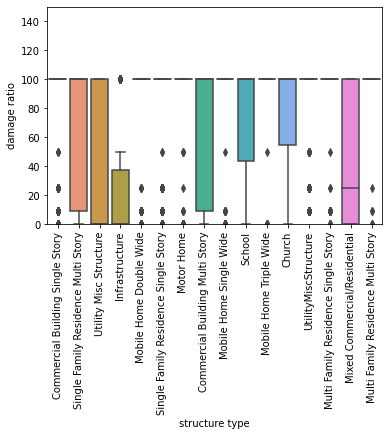

In [23]:
ax = sns.boxplot(x='STRUCTURET', y="damageRatio", data=dins)#, order=["No Damage", "Affected (1-9%)", "Minor (10-25%)", "Major (26-50%)", "Destroyed (>50%)"])
ax.set(xlabel='structure type', ylabel='damage ratio')
ax.set(ylim=(0, 150))
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

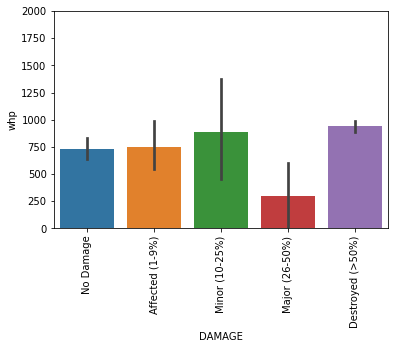

In [24]:
# comparing damage ratio for a single familyt versus versus structure densitty
ax = sns.barplot(x="DAMAGE", y="whp", data=dins[dins['STRUCTURET']=='Single Family Residence Multi Story'], order=["No Damage", "Affected (1-9%)", "Minor (10-25%)", "Major (26-50%)", "Destroyed (>50%)"])
ax.set(ylim=(0, 2000))
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

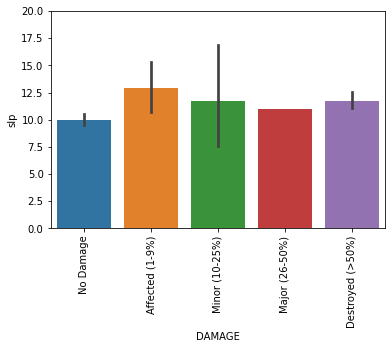

In [25]:
ax = sns.barplot(x="DAMAGE", y="slp", data=dins[dins['STRUCTURET']=='Single Family Residence Multi Story'], order=["No Damage", "Affected (1-9%)", "Minor (10-25%)", "Major (26-50%)", "Destroyed (>50%)"])
ax.set(ylim=(0, 20))
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

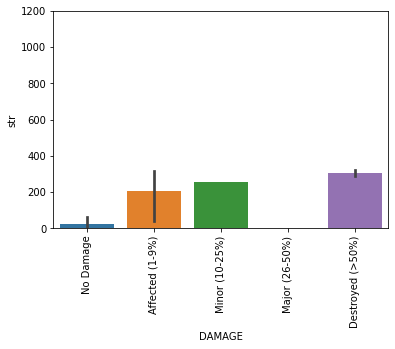

In [30]:
ax = sns.barplot(x="DAMAGE", y="str", data=dins[dins['STRUCTURET']=='Multi Family Residence Multi Story'], order=["No Damage", "Affected (1-9%)", "Minor (10-25%)", "Major (26-50%)", "Destroyed (>50%)"])
ax.set(ylim=(0, 1200))
plt.xticks(rotation=90)

Automatically created module for IPython interactive environment


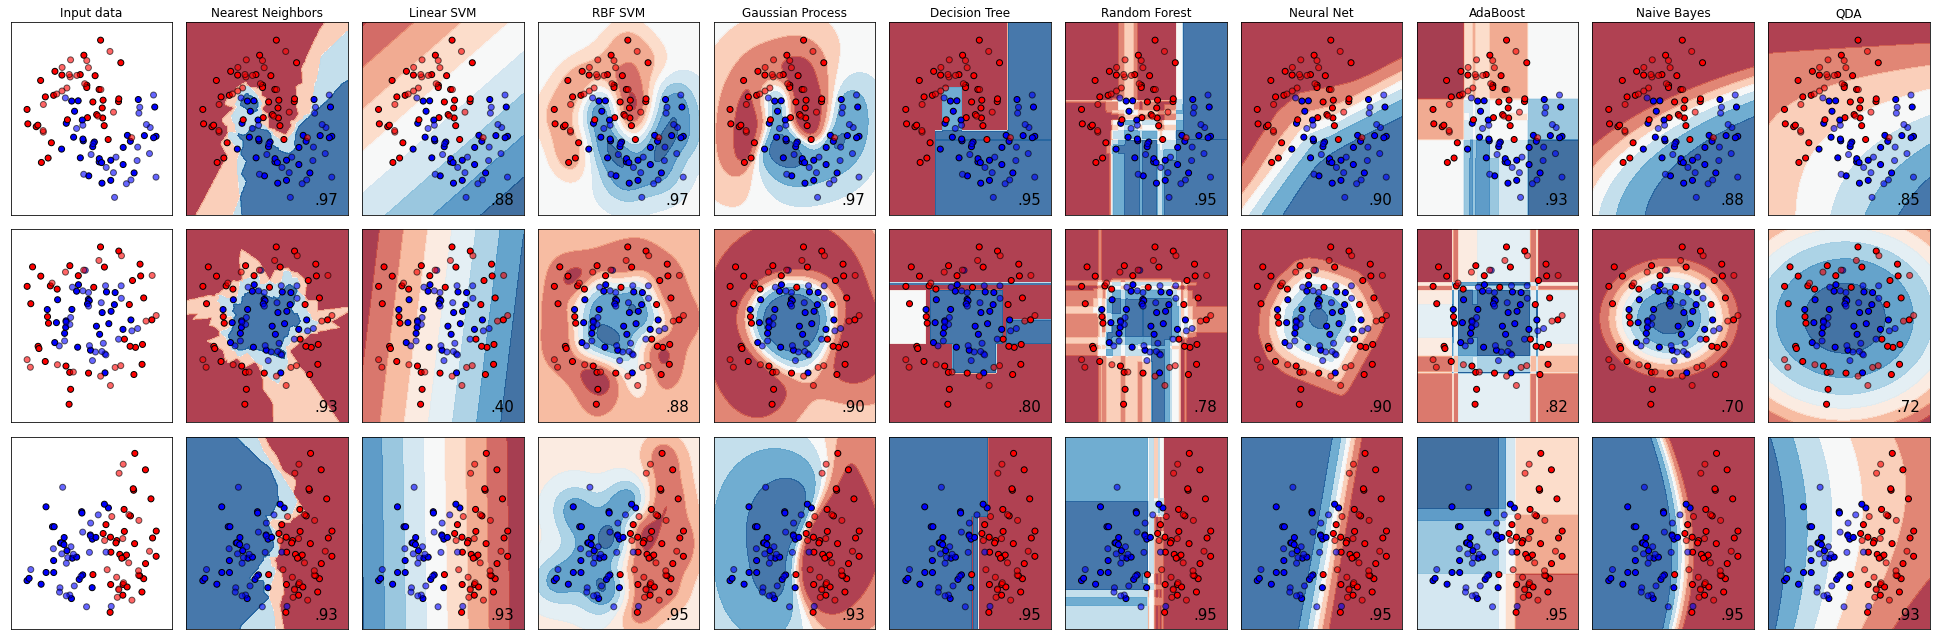

In [10]:
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

In [12]:
dins['slp']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
29303    15.0
29304    12.0
29305     6.0
29306    13.0
29307     6.0
Name: slp, Length: 29308, dtype: float64